# Data Overview

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('netflix_titles.csv')

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


df.info()

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data Cleaning

Handle missing values (drop or fill)

Convert date_added to datetime format

drop unwanted column(description) from the dataset

splitting listed_in column into list

### Handling missing values 

In [20]:
 df['director'] = df['director'].fillna('Unknown Director')

In [44]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [34]:
df = df.dropna(subset=['rating','duration'])


In [98]:
df['cast'] = df['cast'].fillna('Unkonown Cast')
df['country'] = df['country'].fillna('Unkonown country')
df['date_added'] = df['date_added'].fillna(0)

In [100]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkonown Cast,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,2021.0
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,International TV Shows,2021.0


### Converting date_added into datetime from object

In [102]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19314 entries, 0 to 19313
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       19314 non-null  object        
 1   type          19314 non-null  object        
 2   title         19314 non-null  object        
 3   director      19314 non-null  object        
 4   cast          19314 non-null  object        
 5   country       19314 non-null  object        
 6   date_added    19314 non-null  datetime64[ns]
 7   release_year  19314 non-null  int64         
 8   rating        19314 non-null  object        
 9   duration      19314 non-null  object        
 10  listed_in     19314 non-null  object        
 11  year_added    19314 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 1.7+ MB


In [106]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkonown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021


### Dropping description column

In [59]:
df = df.drop(columns=['description'])

### Split listed_in column into list

In [63]:
df['listed_in'] = df['listed_in'].str.split(', ')

df = df.explode('listed_in').reset_index(drop=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkonown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unkonown country,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows


# Visualization

### Movies v/s TV Shows Analysis

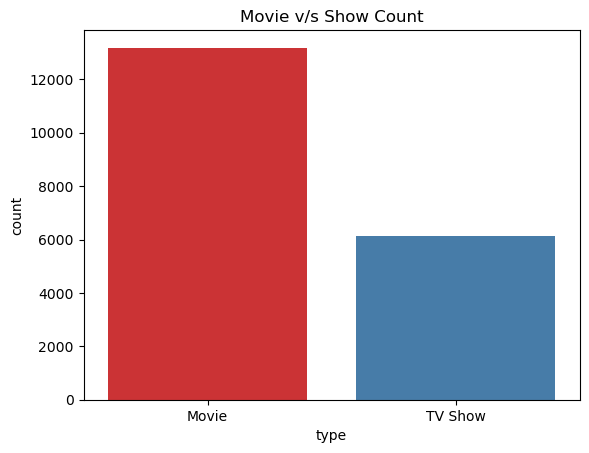

In [130]:
sns.countplot(x='type', hue='type', data=df, palette='Set1', legend=False)
plt.title('Movie v/s Show Count')
plt.show()

Conclusion:- 
More number of movies are relased than the TV Shows

### Year with maximum no of movies and TV Shows released 

In [121]:
df['release_year'].value_counts()

release_year
2018    2513
2019    2252
2017    2159
2020    2086
2016    1948
        ... 
1946       3
1959       2
1961       2
1947       2
1925       1
Name: count, Length: 74, dtype: int64

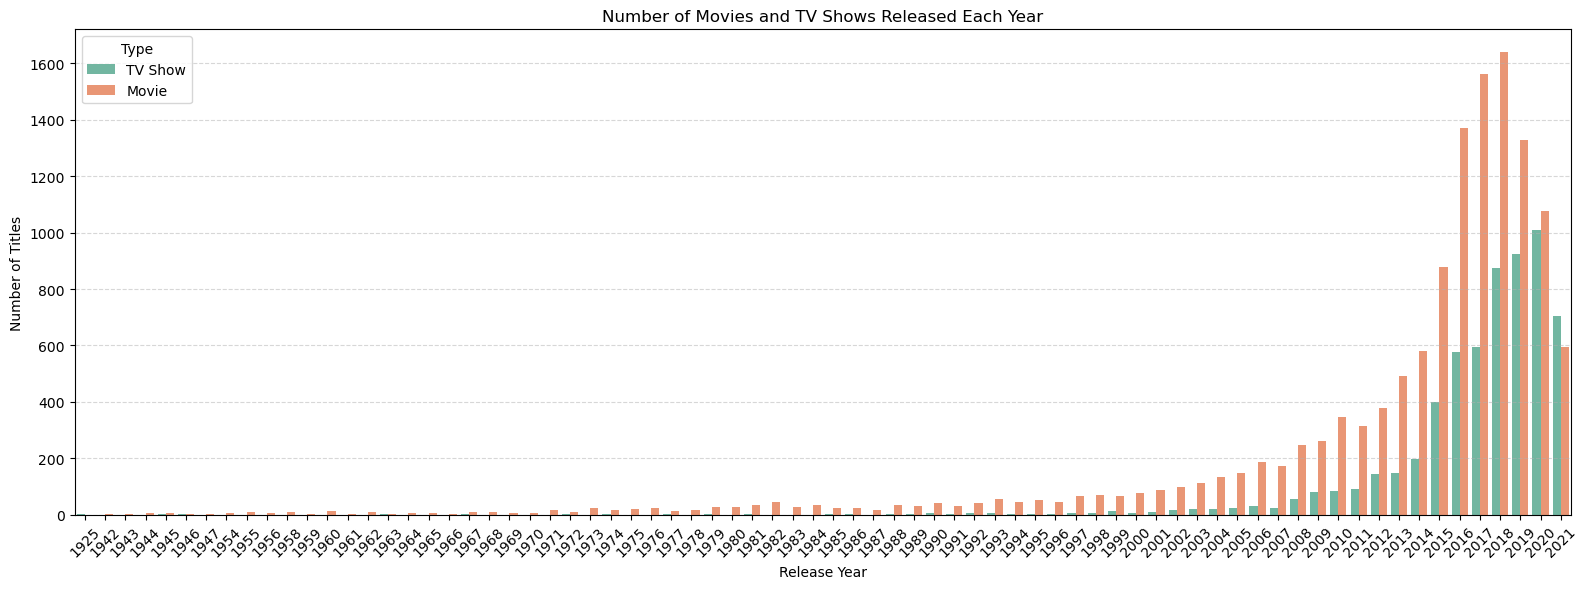

In [119]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='release_year', hue='type', palette='Set2',
              order=sorted(df['release_year'].unique()))

plt.title("Number of Movies and TV Shows Released Each Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Conclusion:- 
Maximum number of Movies and TV shows are released in 2018 

### TV Show with maximum no of Seasons

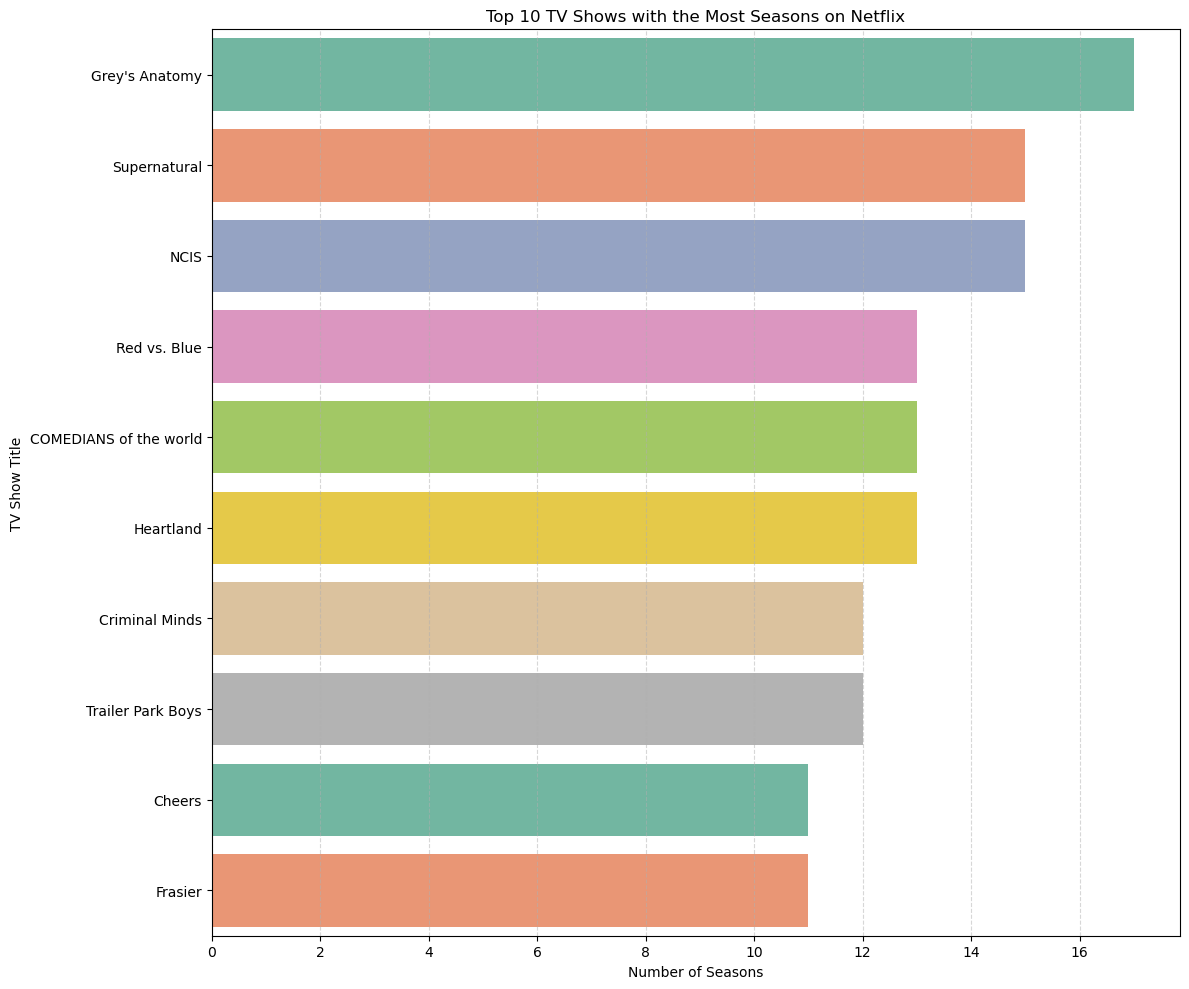

In [149]:
# Make copy of df as tv_shows and extract only value from the duration
tv_shows = df[df['type']=='TV Show'].copy()
tv_shows['duration_season'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

# Drop duplicates TV_Shows 
tv_shows_unique = tv_shows.sort_values(by='duration_season', ascending=False)
tv_shows_unique  = tv_shows_unique.drop_duplicates(subset='title',keep='first')

# Sort to get top 10 TV shows
top_seasons = tv_shows_unique.head(10)

# Visualisation
plt.figure(figsize=(12,10))
sns.barplot(data=top_seasons, hue='title', x='duration_season', y='title', palette='Set2',legend=False)
plt.title('Top 10 TV Shows with the Most Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('TV Show Title')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [141]:
tv_shows['title'].duplicated().sum()

3455

Grey's Anatomy show has maximum number of seasons

### What are the top 10 most common genres on Netflix?

In [162]:
# top genre value counts
top_genre = df['listed_in'].value_counts().head(10)

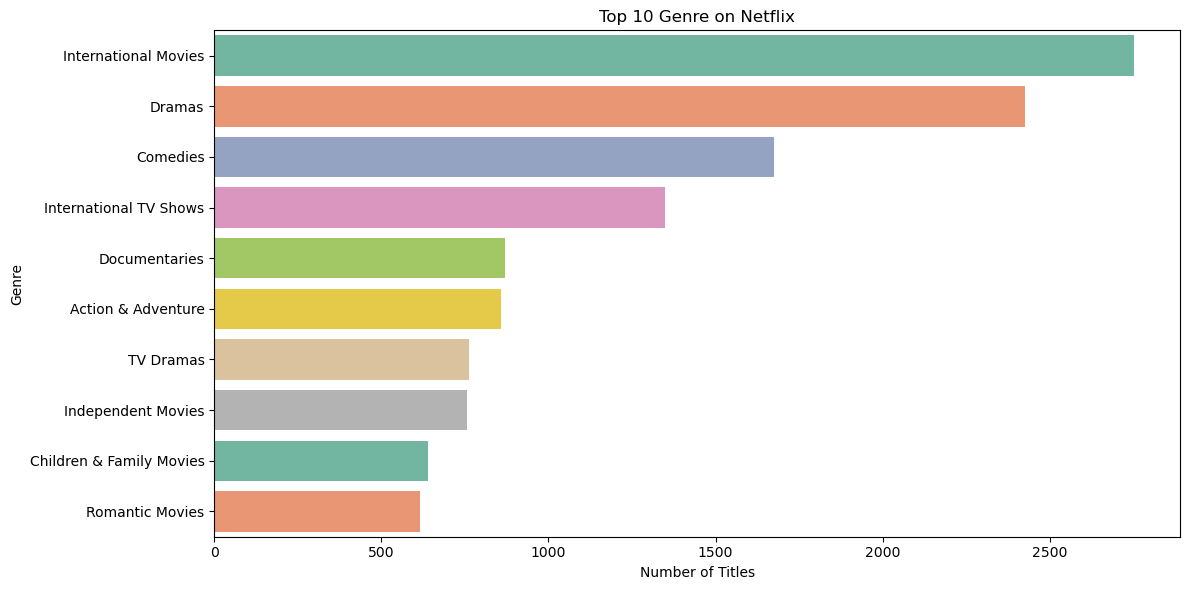

In [174]:
# Visualisation
plt.figure(figsize=(12,6))
sns.barplot(x=top_genre.values, hue=top_genre.index, y=top_genre.index, palette='Set2', legend=False)

plt.title('Top 10 Genre on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

International Movies and Dramas are Most Common released Genre on Netflix

### Movies Duration in Netflix?

In [190]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkonown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021


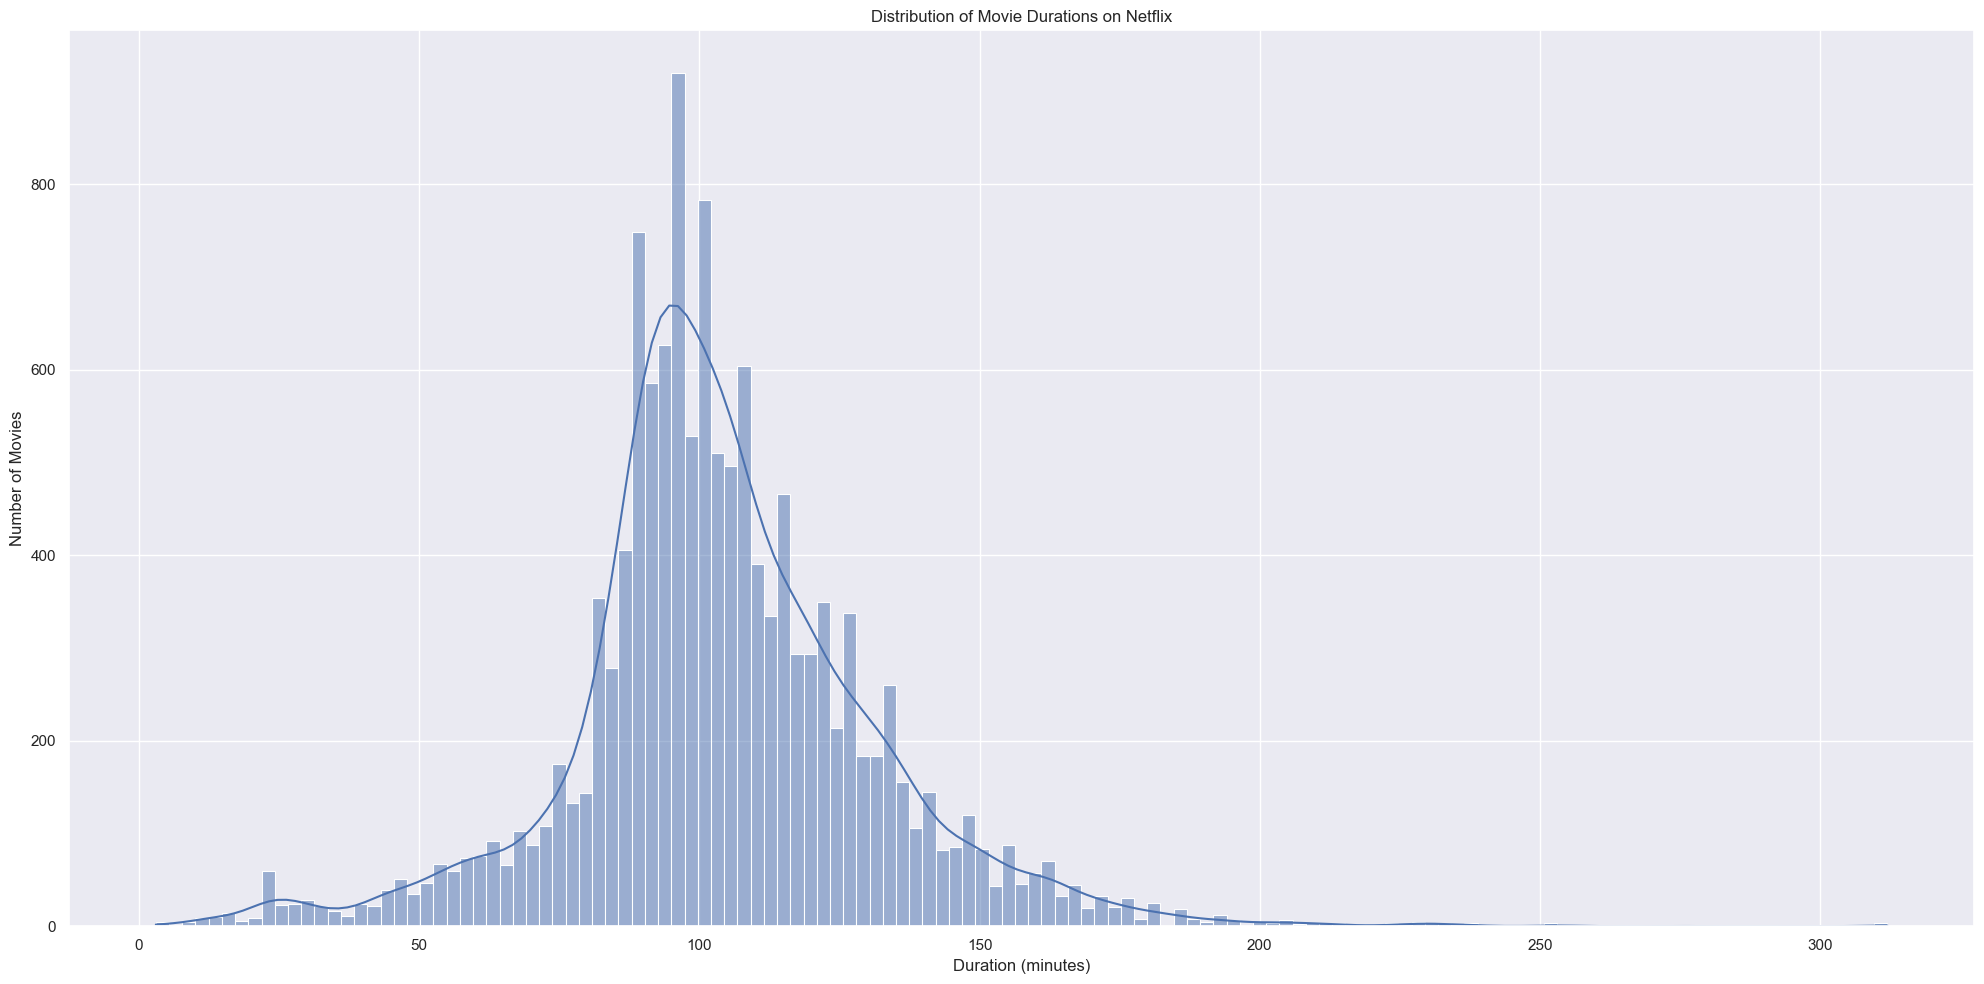

In [201]:
# Creating new dataframe and extracting only value from duration
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_in_min'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)

# Removing duplicates from the duration
df_movies = df_movies.dropna(subset=['duration_in_min'])

# Visualisation
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.histplot(data=df_movies, x='duration_in_min', kde=True)
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

### Top Rating content on Netflix

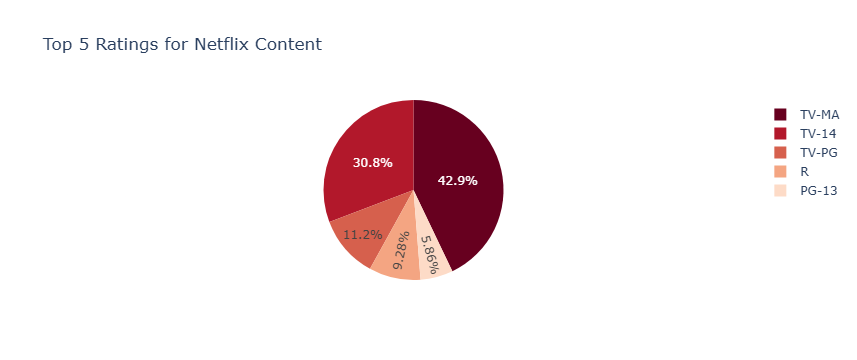

In [242]:
rating_count = df['rating'].value_counts().head(5).reset_index()
rating_count.columns = ['rating', 'count']

fig = px.pie(
    rating_count,
    values='count',
    names='rating',
    color_discrete_sequence=px.colors.sequential.RdBu,
    title='Top 5 Ratings for Netflix Content'
)

fig.update_traces(textposition='inside', textinfo='percent')
fig.show()


TV-MA is the most rating category among all with 62%

### Most Content creating country 

In [265]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkonown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021


In [312]:
country_count = df['country'].value_counts().head(20).reset_index()
country_count.columns = ['country','count']

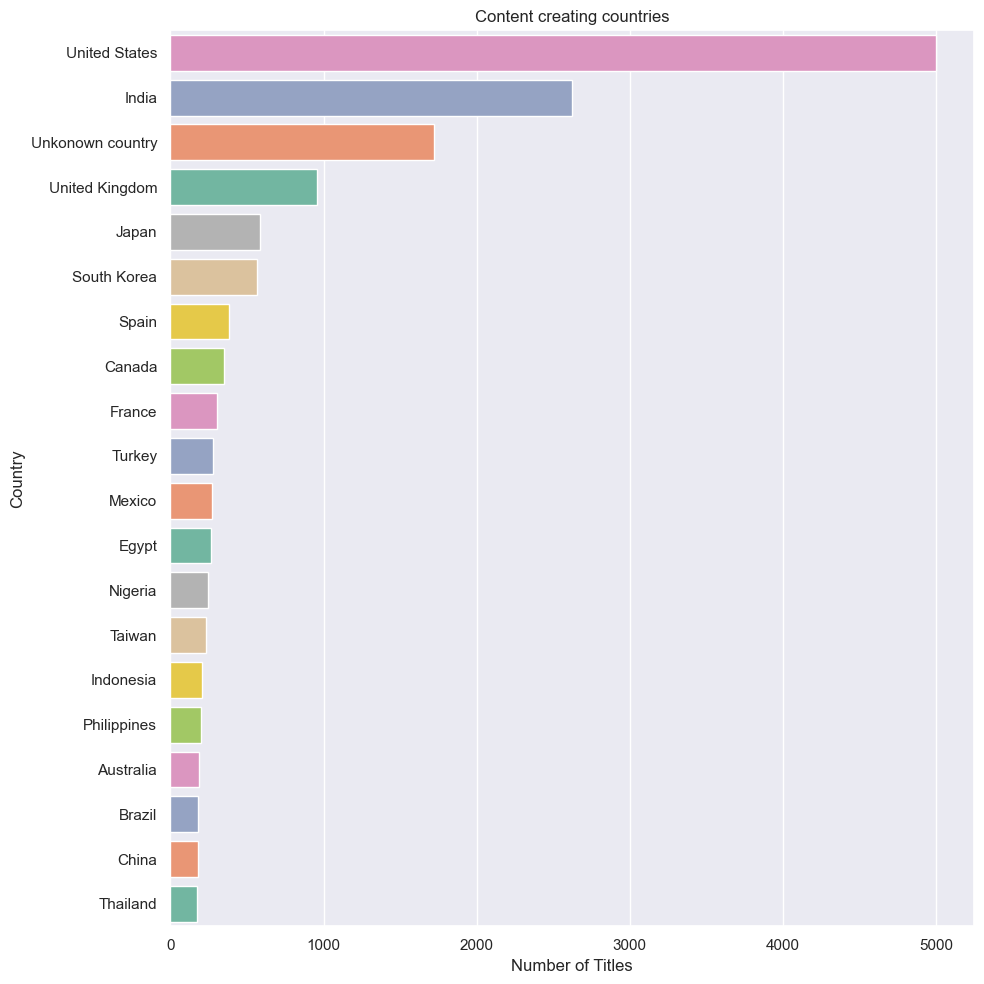

In [324]:
plt.figure(figsize=(10,10))
sns.barplot(data=country_count, y='country', hue='count', x='count', palette='Set2', legend=False)
plt.title('Content creating countries')
plt.ylabel('Country')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

United States released maximum no of contents